In [17]:
import PyQt6.QtCore
import os
os.environ["QT_API"] = "pyqt5"
import matplotlib.pyplot as plt

%matplotlib qt
import pandas as pd
import seaborn as sns
import numpy as np



In [10]:
# Load the CSV file to check its contents
file_path = 'classification_results_3_fbcsp.csv'
classification_data = pd.read_csv(file_path)

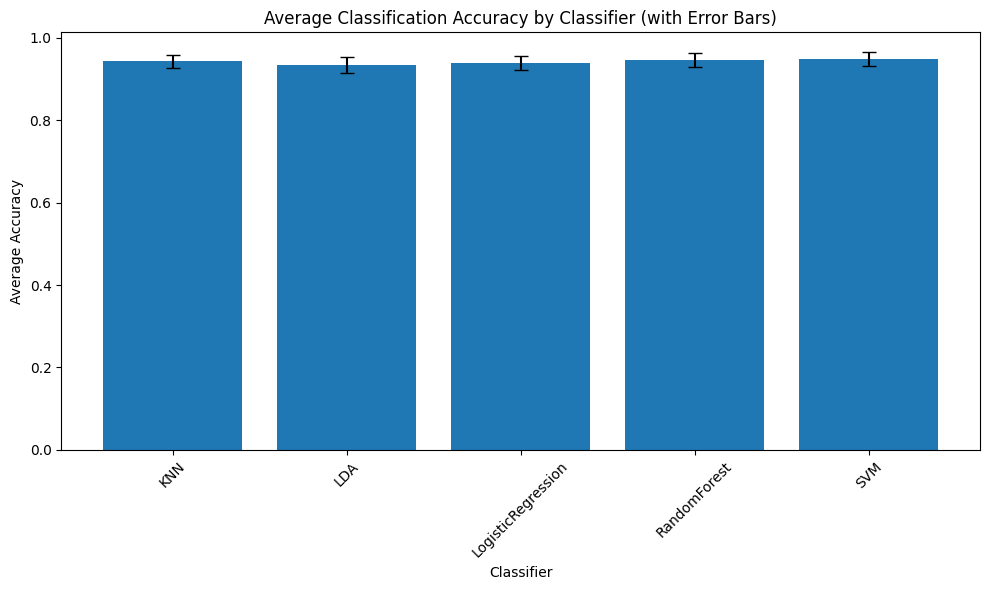

In [11]:
import matplotlib.pyplot as plt

# Group by classifier and calculate the mean and standard deviation
classifier_summary = classification_data.groupby('classifier').agg(
    mean_accuracy=('mean_accuracy', 'mean'),
    std_accuracy=('std_accuracy', 'mean')
).reset_index()

# Create the plot
plt.figure(figsize=(10,6))
plt.bar(classifier_summary['classifier'], classifier_summary['mean_accuracy'], 
        yerr=classifier_summary['std_accuracy'], capsize=5)

# Customize the plot
plt.xlabel('Classifier')
plt.ylabel('Average Accuracy')
plt.title('Average Classification Accuracy by Classifier (with Error Bars)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
new_file_path = 'classification_results_3FBCSP_perband_summary.csv'
new_classification_data = pd.read_csv(new_file_path)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

classifiers = new_classification_data['classifier'].unique()
bar_width = 0.15
positions = np.arange(len(new_classification_data['band'].unique()))

# Reorder the bands to be 'theta', 'alpha', 'beta'
new_classification_data['band'] = pd.Categorical(new_classification_data['band'], categories=['theta', 'alpha', 'beta'], ordered=True)

# Sort the data by the new band order
new_classification_data = new_classification_data.sort_values('band')


# Replot with the reordered bands
plt.figure(figsize=(12,8))

# Loop through classifiers and plot each one separately with reordered bands
for i, classifier in enumerate(classifiers):
    classifier_data = new_classification_data[new_classification_data['classifier'] == classifier]
    offset_positions = [pos + i * bar_width for pos in positions]
    
    plt.bar(offset_positions, classifier_data['avg_accuracy'], bar_width, 
            yerr=classifier_data['std_accuracy'], capsize=5, label=classifier)

# Customize the plot
plt.xlabel('Frequency Band')
plt.ylabel('Average Accuracy')
plt.title('Average Classification Accuracy by Classifier and Frequency Band (with Error Bars)')
plt.xticks([pos + bar_width * (len(classifiers) / 2 - 0.5) for pos in positions], ['theta', 'alpha', 'beta'])  # Center the ticks
plt.legend(title='Classifier')
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
logo_detailed_file_path = 'classification_results_3FBCSP_logo_detailed.csv'
logo_detailed_data = pd.read_csv(logo_detailed_file_path)

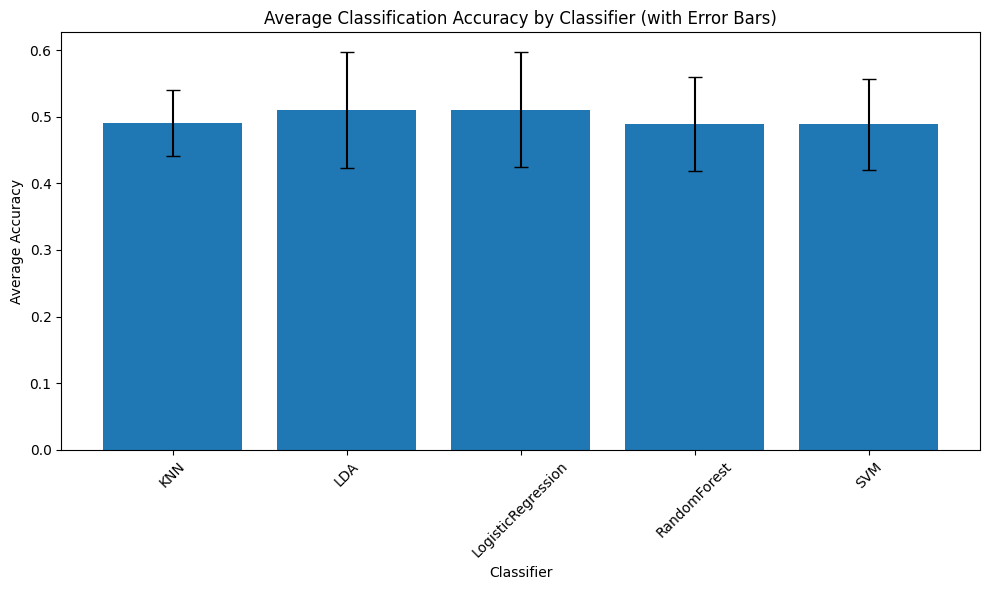

In [16]:
# Calculate the standard deviation of accuracy for each classifier
accuracy_stats_per_classifier = logo_detailed_data.groupby('classifier')['score'].agg(['mean', 'std']).reset_index()

# Create a bar plot with error bars representing the standard deviation
plt.figure(figsize=(10,6))
plt.bar(accuracy_stats_per_classifier['classifier'], accuracy_stats_per_classifier['mean'], 
        yerr=accuracy_stats_per_classifier['std'], capsize=5)

# Customize the plot
plt.xlabel('Classifier')
plt.ylabel('Average Accuracy')
plt.title('Average Classification Accuracy by Classifier (with Error Bars)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
import pandas as pd
# Load all three CSV files to check their contents
file1_path = 'classification_results.csv'
file2_path = 'classification_results_2.csv'
file3_path = 'classification_results_3_fbcsp.csv'

# Load the data
classification1_data = pd.read_csv(file1_path)
classification2_data = pd.read_csv(file2_path)
classification3_data = pd.read_csv(file3_path)

# Display the first few rows of each to understand their structure
classification1_data.head(), classification2_data.head(), classification3_data.head()


(   participant          classifier  mean_accuracy  std_accuracy
 0            1  LogisticRegression       0.702001      0.027968
 1            1                 LDA       0.692377      0.027743
 2            1                 SVM       0.668258      0.044061
 3            1        RandomForest       0.624834      0.028296
 4            1                 KNN       0.569361      0.025416,
    participant          classifier  mean_accuracy  std_accuracy
 0            1  LogisticRegression       0.815400      0.039922
 1            1                 SVM       0.846776      0.021968
 2            1                 LDA       0.799723      0.040773
 3            1                 KNN       0.821475      0.018075
 4            1        RandomForest       0.844359      0.019117,
    participant          classifier  mean_accuracy  std_accuracy
 0            1  LogisticRegression       0.819051      0.036782
 1            1                 SVM       0.848003      0.025710
 2            1        

In [20]:
# Add a column to each dataset to indicate the feature extraction method
classification1_data['feature_extraction'] = 'Powerband features'
classification2_data['feature_extraction'] = 'CSP filters'
classification3_data['feature_extraction'] = 'Filterbank CSP filters'

# Combine all datasets into one
combined_data = pd.concat([classification1_data, classification2_data, classification3_data])

# Create a boxplot to show classifier performance grouped by feature extraction method
plt.figure(figsize=(12, 6))
sns.boxplot(x='feature_extraction', y='mean_accuracy', hue='classifier', data=combined_data, notch = True)

# Customize the plot
plt.xlabel('Feature Extraction Method')
plt.ylabel('Classification Accuracy')
plt.title('Classifier Performance by Feature Extraction Method')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
# Extract accuracy values for each classifier grouped by participants for statistical analysis
# Include all participant accuracies for each feature extraction method
from scipy.stats import shapiro, f_oneway, wilcoxon

# Prepare data for each classifier
statistical_results = {}
classifiers = classification1_data['classifier'].unique()

valid_pids = [el for el in range(1, 32) if el not in [5, 13, 14, 16, 17, 20, 31]]

# Filter each dataset to include only the valid participants
classification1_data = classification1_data[classification1_data['participant'].isin(valid_pids)]
classification2_data = classification2_data[classification2_data['participant'].isin(valid_pids)]
classification3_data = classification3_data[classification3_data['participant'].isin(valid_pids)]

print("1 len: " + str(len(classification1_data)))
print("2 len: " + str(len(classification2_data)))
print("3 len: " + str(len(classification3_data)))


# Perform normality test for Logistic Regression across all feature extraction methods
classification1_data_temp = classification1_data[classification1_data['classifier'] == 'LogisticRegression']['mean_accuracy']
classification2_data_temp = classification2_data[classification2_data['classifier'] == 'LogisticRegression']['mean_accuracy']
classification3_data_temp = classification3_data[classification3_data['classifier'] == 'LogisticRegression']['mean_accuracy']

# Combine all accuracies for Logistic Regression
logreg_all_accuracies = pd.concat([classification1_data_temp, classification2_data_temp, classification3_data_temp])

# Normality test using Shapiro-Wilk for Logistic Regression
normality_test_stat, normality_p_value = shapiro(logreg_all_accuracies)

# Check if the data is normally distributed
if normality_p_value > 0.05:
    # Data is normally distributed; use one-way ANOVA (F-test) for comparisons
    for classifier in classifiers:
        # Get participant accuracies for the current classifier across feature extraction methods
        acc_powerband = classification1_data[classification1_data['classifier'] == classifier]['mean_accuracy']
        acc_csp = classification2_data[classification2_data['classifier'] == classifier]['mean_accuracy']
        acc_fbcsp = classification3_data[classification3_data['classifier'] == classifier]['mean_accuracy']

        # Perform one-way ANOVA test
        f_stat, p_value = f_oneway(acc_powerband, acc_csp, acc_fbcsp)
        statistical_results[classifier] = ('ANOVA', f_stat, p_value)
else:
    # Data is not normally distributed; use Wilcoxon rank-sum test for pairwise comparisons
    for classifier in classifiers:
        pairwise_results = {}
        
        # Get participant accuracies for each pair of feature extraction methods
        acc_powerband = classification1_data[classification1_data['classifier'] == classifier]['mean_accuracy']
        acc_csp = classification2_data[classification2_data['classifier'] == classifier]['mean_accuracy']
        acc_fbcsp = classification3_data[classification3_data['classifier'] == classifier]['mean_accuracy']

        # Powerband vs CSP
        wilcoxon_stat_1, p_value_1 = wilcoxon(acc_powerband, acc_csp)
        pairwise_results['Powerband vs CSP'] = (wilcoxon_stat_1, p_value_1)
        
        # Powerband vs Filterbank CSP
        wilcoxon_stat_2, p_value_2 = wilcoxon(acc_powerband, acc_fbcsp)
        pairwise_results['Powerband vs Filterbank CSP'] = (wilcoxon_stat_2, p_value_2)
        
        # CSP vs Filterbank CSP
        wilcoxon_stat_3, p_value_3 = wilcoxon(acc_csp, acc_fbcsp)
        pairwise_results['CSP vs Filterbank CSP'] = (wilcoxon_stat_3, p_value_3)

        statistical_results[classifier] = ('Wilcoxon', pairwise_results)

# Display the results
statistical_results


1 len: 120
2 len: 120
3 len: 120


{'LogisticRegression': ('Wilcoxon',
  {'Powerband vs CSP': (np.float64(39.0), np.float64(0.0008462667465209961)),
   'Powerband vs Filterbank CSP': (np.float64(4.0),
    np.float64(8.344650268554688e-07)),
   'CSP vs Filterbank CSP': (np.float64(19.0),
    np.float64(3.6597251892089844e-05))}),
 'LDA': ('Wilcoxon',
  {'Powerband vs CSP': (np.float64(15.0), np.float64(1.633167266845703e-05)),
   'Powerband vs Filterbank CSP': (np.float64(1.0),
    np.float64(2.384185791015625e-07)),
   'CSP vs Filterbank CSP': (np.float64(10.0),
    np.float64(5.125999450683594e-06))}),
 'SVM': ('Wilcoxon',
  {'Powerband vs CSP': (np.float64(6.0), np.float64(1.6689300537109375e-06)),
   'Powerband vs Filterbank CSP': (np.float64(1.0),
    np.float64(2.384185791015625e-07)),
   'CSP vs Filterbank CSP': (np.float64(30.0),
    np.float64(0.00023925304412841797))}),
 'RandomForest': ('Wilcoxon',
  {'Powerband vs CSP': (np.float64(4.0), np.float64(8.344650268554688e-07)),
   'Powerband vs Filterbank CSP': (n

In [23]:
print(classification1_data.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [26]:
# Perform normality test for Logistic Regression across all feature extraction methods
logreg_accuracies_powerband = classification1_data[classification1_data['classifier'] == 'LogisticRegression']['mean_accuracy']
logreg_accuracies_csp = classification2_data[classification2_data['classifier'] == 'LogisticRegression']['mean_accuracy']
logreg_accuracies_fbcsp = classification3_data[classification3_data['classifier'] == 'LogisticRegression']['mean_accuracy']

# Combine all accuracies for Logistic Regression
logreg_all_accuracies = pd.concat([logreg_accuracies_powerband, logreg_accuracies_csp, logreg_accuracies_fbcsp])

# Normality test using Shapiro-Wilk for Logistic Regression
normality_test_stat, normality_p_value = shapiro(logreg_all_accuracies)

# Prepare data for each classifier
statistical_results = {}
classifiers = classification1_data['classifier'].unique()

# Check if the data is normally distributed
if normality_p_value > 0.05:
    # Data is normally distributed; use one-way ANOVA (F-test) for comparisons
    for classifier in classifiers:
        # Get participant accuracies for the current classifier across feature extraction methods
        acc_powerband = classification1_data[classification1_data['classifier'] == classifier]['mean_accuracy']
        acc_csp = classification2_data[classification2_data['classifier'] == classifier]['mean_accuracy']
        acc_fbcsp = classification3_data[classification3_data['classifier'] == classifier]['mean_accuracy']

        # Perform one-way ANOVA test
        f_stat, p_value = f_oneway(acc_powerband, acc_csp, acc_fbcsp)
        statistical_results[classifier] = ('ANOVA', f_stat, p_value)
else:
    # Data is not normally distributed; use Wilcoxon rank-sum test for pairwise comparisons
    for classifier in classifiers:
        pairwise_results = {}

        # Get participant accuracies for each pair of feature extraction methods
        acc_powerband = classification1_data[classification1_data['classifier'] == classifier]['mean_accuracy']
        acc_csp = classification2_data[classification2_data['classifier'] == classifier]['mean_accuracy']
        acc_fbcsp = classification3_data[classification3_data['classifier'] == classifier]['mean_accuracy']

        # Powerband vs CSP
        wilcoxon_stat_1, p_value_1 = wilcoxon(acc_powerband, acc_csp)
        pairwise_results['Powerband vs CSP'] = (wilcoxon_stat_1, p_value_1)

        # Powerband vs Filterbank CSP
        wilcoxon_stat_2, p_value_2 = wilcoxon(acc_powerband, acc_fbcsp)
        pairwise_results['Powerband vs Filterbank CSP'] = (wilcoxon_stat_2, p_value_2)

        # CSP vs Filterbank CSP
        wilcoxon_stat_3, p_value_3 = wilcoxon(acc_csp, acc_fbcsp)
        pairwise_results['CSP vs Filterbank CSP'] = (wilcoxon_stat_3, p_value_3)

        statistical_results[classifier] = ('Wilcoxon', pairwise_results)

# Display the results
statistical_results


KeyError: 'classifier'

In [ ]:
from statsmodels.stats.multitest import multipletests

# Extract all p-values from the statistical results for correction
p_values = []
comparisons = []

for classifier, (test_type, results) in statistical_results.items():
    if isinstance(results, dict):  # Ensure there are pairwise comparisons
        for comparison, (stat, p_value) in results.items():
            p_values.append(p_value)
            comparisons.append((classifier, comparison))

# Apply Bonferroni and Benjamini-Hochberg corrections
bonferroni_corrected = multipletests(p_values, method='bonferroni')
bh_corrected = multipletests(p_values, method='fdr_bh')

# Collect and format the results
correction_results = []

for i, (classifier, comparison) in enumerate(comparisons):
    original_p = p_values[i]
    bonf_corrected_p = bonferroni_corrected[1][i]
    bh_corrected_p = bh_corrected[1][i]
    correction_results.append({
        'Classifier': classifier,
        'Comparison': comparison,
        'Original p-value': original_p,
        'Bonferroni-corrected p-value': bonf_corrected_p,
        'Benjamini-Hochberg-corrected p-value': bh_corrected_p
    })

# Display the corrected p-values
correction_results_df = pd.DataFrame(correction_results)
import ace_tools as tools; tools.display_dataframe_to_user(name="P-Value Corrections", dataframe=correction_results_df)

correction_results_df


In [ ]:
# Function to calculate rank-biserial correlation for Wilcoxon signed-rank test
def rank_biserial(w_stat, n):
    return 1 - (2 * w_stat / (n * (n + 1) / 2))

# Calculate effect sizes (rank-biserial correlation) for each pairwise Wilcoxon test
effect_sizes = []

for classifier, (test_type, results) in statistical_results.items():
    if isinstance(results, dict):  # Ensure there are pairwise comparisons
        for comparison, (w_stat, p_value) in results.items():
            # Number of observations (valid PIDs)
            n = len(valid_pids)

            # Calculate rank-biserial correlation
            rb_correlation = rank_biserial(w_stat, n)

            # Store the results
            effect_sizes.append({
                'Classifier': classifier,
                'Comparison': comparison,
                'Wilcoxon Stat': w_stat,
                'p-value': p_value,
                'Rank-Biserial Correlation': rb_correlation
            })

# Create a DataFrame for the effect sizes
effect_sizes_df = pd.DataFrame(effect_sizes)

# Display the effect sizes
import ace_tools as tools; tools.display_dataframe_to_user(name="Effect Sizes (Rank-Biserial Correlation)", dataframe=effect_sizes_df)

effect_sizes_df
